In [23]:
import matplotlib.pyplot as plt
import time
import pickle
import numpy as np
import seaborn as sns
import pandas as pd

In [24]:
def generate_exp_data(name,plotx,ploty,alg=None,pl=False):
    file = open(name,"rb")
    trials = pickle.load(file)
    file.close()
    pdict = {}
    for idx,r in enumerate(trials.results):
        cl = r['loss']
        fcl = r['fitness_curve']
        td = r['time']
        if pdict.get('fitness') == None:
            pdict['fitness'] = []
        else:
            pdict['fitness'].append(cl*(-1))
        if pdict.get('fitness_curve') == None:
            pdict['fitness_curve'] = []
        else:
            pdict['fitness_curve'].append(fcl)
        if pdict.get('time') == None:
            pdict['time'] = []
        else:
            pdict['time'].append(td)
        cp = r['params']
        for p in cp:
            cv = cp[p]
            if pdict.get(p) == None:
                pdict[p] = []
            else:
                pdict[p].append(cv)
    final = pd.DataFrame.from_dict(pdict)
    if alg and final['alg'].values[0] == alg:
        
        if not pl:
            sns.lineplot(x=plotx,
                         y=ploty,
                         data=final,
                         label=final['alg'].values[0])
            plt.savefig(ploty +"-" + plotx + ".png")
            plt.close
        else:
            param_range = final[plotx].values
            prange = [str(i) for i in param_range]
            sns.lineplot(x=prange,
                            y=ploty,
                            data=final,
                            label=final['alg'].values[0])
            plt.xticks(
                        rotation=45, 
                        horizontalalignment='right' 
                    )
            
            #sns.boxplot( y=final[plotx], x=final[ploty] )
            plt.savefig(ploty +"-" + plotx + ".png")
            plt.close
        return
    elif alg is None:
        if not pl:
            sns.lineplot(x=plotx,
                         y=ploty,
                         data=final,
                         label=final['alg'].values[0])
            plt.savefig(ploty +"-" + plotx + ".png")
            plt.close
        else:
            param_range = final[plotx].values
            prange = [str(i) for i in param_range]
            sns.lineplot(x=prange,
                            y=ploty,
                            data=final,
                            label=final['alg'].values[0])
            plt.xticks(
                        rotation=45, 
                        horizontalalignment='right' 
                    )
            plt.savefig(ploty +"-" + plotx + ".png")
            plt.close
        return
    else:
        return

In [25]:
def generate_nq_plots(x,y,algo=None,plot=False):
    for n in ["queens-annealing.p",
              'queens-genetic.p',
              'queens-mimic.p',
              'queens-rhc.p',
             ]:
        generate_exp_data(n,x,y,algo,plot)

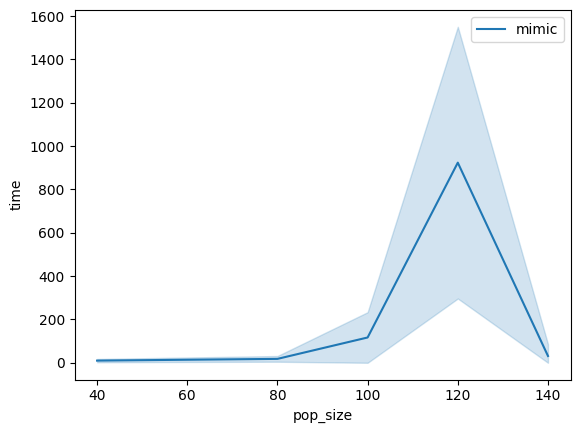

In [45]:
generate_nq_plots("pop_size","time",algo="mimic")

In [46]:
np.logspace(-4,0,6)

array([1.00000000e-04, 6.30957344e-04, 3.98107171e-03, 2.51188643e-02,
       1.58489319e-01, 1.00000000e+00])

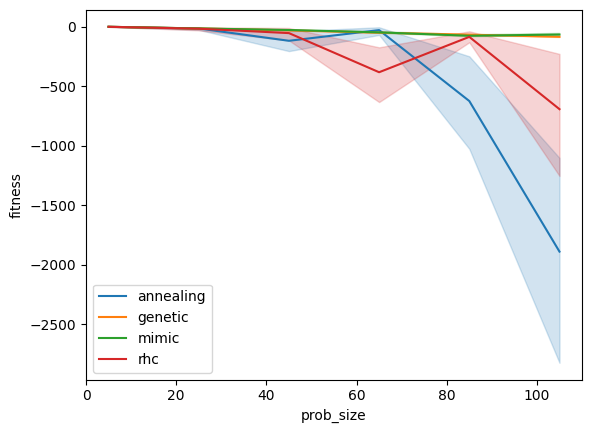

In [36]:
generate_nq_plots("prob_size","fitness")

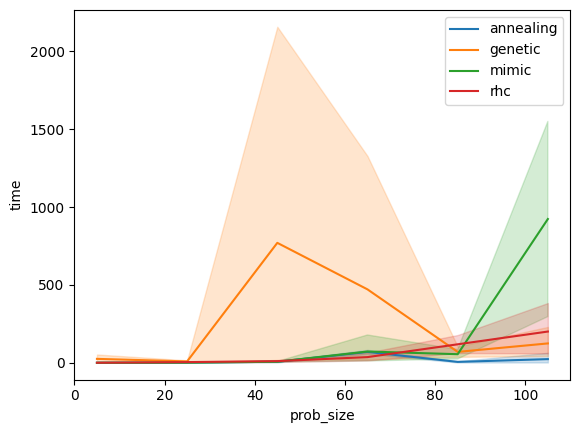

In [34]:
generate_nq_plots("prob_size","time")

In [4]:
def nq_bf(name,lb):
    file = open(name,"rb")
    trials = pickle.load(file)
    file.close()
    loss = (trials.results[np.argmin([r['loss'] for r in trials.results])]['loss'])
    best_fitness = trials.results[np.argmin([r['loss'] for r in trials.results])]['fitness_curve']
    best_params = trials.results[np.argmin([r['loss'] for r in trials.results])]['params']
    best_time = trials.results[np.argmin([r['loss'] for r in trials.results])]['time']
    best_params['fitness'] = loss
    best_params['best_time'] = best_time
    values = items = ',\n'.join(f'{key} {value}' for key, value in best_params.items())
    plt.figure()
    plt.plot(best_fitness, label = values)
    plt.title('Fitness Curve ' + lb)
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.savefig(name[:-2] + "-fitness.png")

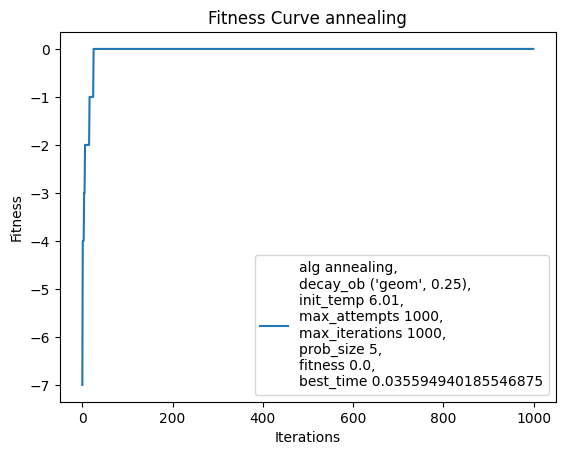

In [5]:
nq_bf("queens-annealing.p","annealing")

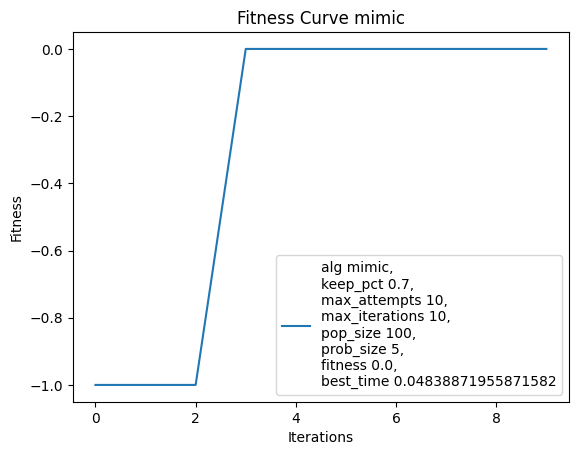

In [6]:
nq_bf("queens-mimic.p","mimic")

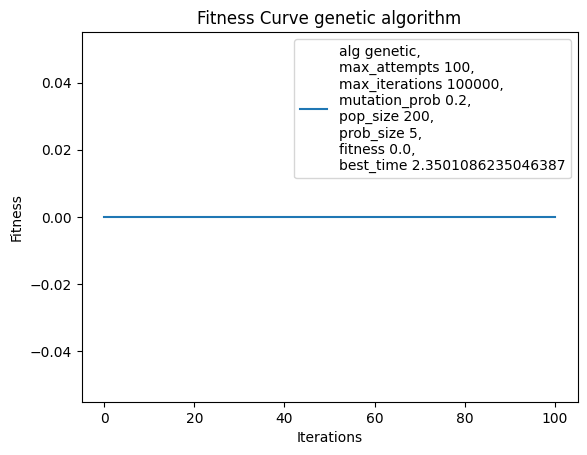

In [7]:
nq_bf("queens-genetic.p","genetic algorithm")

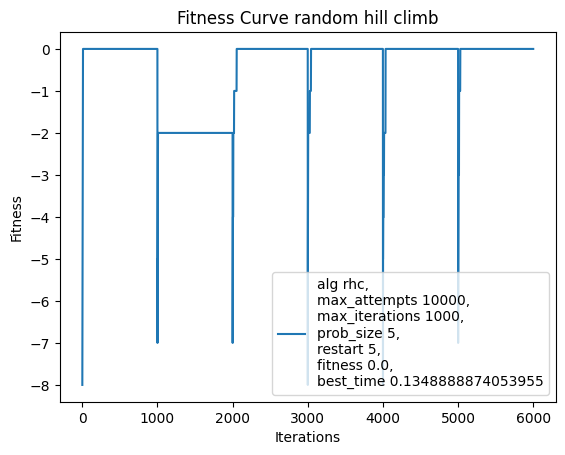

In [8]:
nq_bf("queens-rhc.p","random hill climb")